In [54]:
import random
import torch
from d2l import torch as d2l

In [55]:
true_w = torch.tensor([2, -3.4])
true_b = torch.tensor([4.2])
features, labels = d2l.synthetic_data(true_w, true_b, 1000)

In [56]:

print('features:', features[0], '\nlabel:', labels[0])

features: tensor([1.5120, 1.6142]) 
label: tensor([1.7322])


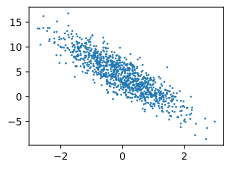

In [57]:
d2l.set_figsize()
d2l.plt.scatter(features[:, 1].numpy(), labels.numpy(), s=1)

In [58]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i: min(i+batch_size, num_examples)])
    yield features[batch_indices], labels[batch_indices]

In [59]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-0.3908,  0.7037],
        [-0.1397, -0.6910],
        [-1.2771, -0.8238],
        [ 0.7470,  1.6713],
        [ 1.2235,  0.9089],
        [-0.1866,  1.7307],
        [-0.6091, -1.8473],
        [ 3.3007, -1.7543],
        [ 0.0542, -0.5454],
        [-0.3621,  1.6142]]) 
 tensor([[ 1.0422e+00],
        [ 6.2708e+00],
        [ 4.4468e+00],
        [ 1.4392e-02],
        [ 3.5581e+00],
        [-2.0534e+00],
        [ 9.2611e+00],
        [ 1.6762e+01],
        [ 6.1717e+00],
        [-2.0254e+00]])


In [60]:
w = torch.zeros(size=(2, 1), requires_grad=True)
b = torch.zeros((1,), requires_grad=True)

In [61]:
def linreg(X, w, b):
    return torch.matmul(X, w) + b

In [62]:
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [63]:
def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad/batch_size
            param.grad.zero_()

In [64]:
lr = 0.03
num_epochs = 5
net = linreg
loss = squared_loss

In [65]:
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        trian_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}: loss {float(trian_l.mean()):f}')

epoch 1: loss 15.984589
epoch 2: loss 14.927289
epoch 3: loss 13.641725
epoch 4: loss 12.883803
epoch 5: loss 12.434227


In [66]:
print(f'w的估计误差：{true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差：{true_b - b.reshape(true_b.shape)}')

w的估计误差：tensor([ 1.6202, -2.9981], grad_fn=<SubBackward0>)
b的估计误差：tensor([3.5920], grad_fn=<SubBackward0>)


In [67]:
d = data_iter(batch_size, features, labels)

In [68]:
next(d)

(tensor([[-0.7272,  0.6042],
         [ 0.0449,  0.8303],
         [ 0.4445,  0.4447],
         [ 0.7802, -0.4497],
         [-0.4730, -1.0192],
         [ 1.0673,  0.6920],
         [-0.4224,  0.5474],
         [-0.8273, -0.0064],
         [ 0.8068, -0.1269],
         [-0.2721,  0.9842]]),
 tensor([[0.7004],
         [1.4527],
         [3.5732],
         [7.2751],
         [6.7310],
         [3.9862],
         [1.4759],
         [2.5708],
         [6.2416],
         [0.3091]]))

In [69]:
type(d)

generator